## Comparing Bayesian Models: The Widely Applicable Information Criterion
   
The Widely Applicable Information Criterion (WAIC) is an information criterion (such as AIC or BIC) that can be used in Bayesian models. The interesting aspect of the WAIC is that it is completely based on the likelihood of the posterior predictions. To compute the WAIC we have simply to be able to compute samples from the posterior, no matter which kind of posterior we are working with.

Let's $y_i$ be a target point in the training sample, we define $Pr(y_i)$ the average likelihood of the point under our model. This means that for each combination of posterior parameters of our model we can compute the associated likelihood of the point, and then average across all the likelihoods. This quantity is called *log-pointwise-predictive-density* (lppd):

$$ lppd = \sum_{i=1}^N \log[Pr(y_i)]. $$

This is the equivalent of the deviance that is computed when computing the AIC. 
While *lppd* accounts for model fit, the second part of WAIC should penalize model complexity. Instead of computing the number of parameters, as in AIC or BIC, WAIC computed the variance $V(y_i)$ of the log-likelihood associated to each data point. In practice, we compute the likelihood of $y_i$ for each combination of parameters from our posterior, and then we compute the variance of these quantities. We therefore define the effective number of parameters $p_{WAIC}$ as:

$$ p_{WAIC} = \sum_{i=1}^N V(y_i) .$$

WAIC is finally defined as 

$$ WAIC = -2 (lppd - p_{WAIC}) $$



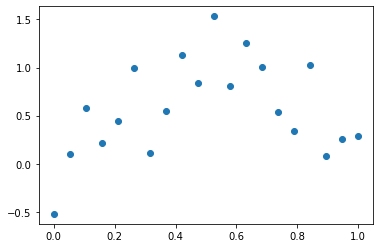

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 20
noise = 0.3
x = np.linspace(0,1,N)
y = np.sin(x*3) + noise * np.random.randn(N)

data_synth = pd.DataFrame({'x' : x, 'y' : y})

plt.scatter(x,y)

In [2]:
%run tools.py

degree = 9
likelihood = 'gaussian'

models = []

for i in range(degree):
    
    data_poly = pd.DataFrame({'y' : y})

    priors = []

    prior_a_mean = 0
    prior_a_sigma = 5
    prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

    priors.append(prior_a)
    
    if i > 0:
        expr = 'y ~ '
        for k in range(1,i+1):
            if k>1:
                expr = expr + '+'
            prior_param_mean = 0
            prior_param_sigma = 5
            prior_param = ['gaussian', [prior_param_mean, prior_param_sigma]]
            priors.append(prior_param)
            data_poly['x'+str(k)] = x**k
            expr = expr + 'x' + str(k)

    sigma_inf = 0.1
    sigma_sup = 5
    prior_sigma_unif = [sigma_inf, sigma_sup]
    prior_sigma = ['uniform', prior_sigma_unif]

    priors.append(prior_sigma)
    
    if i > 0:
        models.append(laplace_solution_regression(expr, data_poly, likelihood, priors))
    else:
        models.append(laplace_solution([1,1],[],data_poly['y'], likelihood, priors))   

      fun: 17.951698006818404
 hess_inv: array([[1.16588731e-02, 3.17626901e-05],
       [3.17626901e-05, 5.90582217e-03]])
      jac: array([ 0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([0.57943025, 0.48259373])
      fun: 19.942970747680416
 hess_inv: array([[ 0.04195083, -0.06193286,  0.00029927],
       [-0.06193286,  0.12323082, -0.00036581],
       [ 0.00029927, -0.00036581,  0.00551345]])
      jac: array([ 5.00679016e-06,  2.14576721e-06, -2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 14
     njev: 18
   status: 0
  success: True
        x: array([0.39825017, 0.36254844, 0.46982752])


/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 15.305185776902478
 hess_inv: array([[ 3.66428942e-02, -1.40830296e-01,  1.13649047e-01,
         5.64830671e-04],
       [-1.40830296e-01,  7.71557039e-01, -7.17210853e-01,
        -3.42092635e-03],
       [ 1.13649047e-01, -7.17210853e-01,  7.17089660e-01,
         3.21198339e-03],
       [ 5.64830671e-04, -3.42092635e-03,  3.21198339e-03,
         2.48583568e-03]])
      jac: array([1.19209290e-07, 2.38418579e-07, 0.00000000e+00, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 137
      nit: 18
     njev: 27
   status: 0
  success: True
        x: array([-0.22556158,  4.33411567, -3.98050206,  0.31724293])


/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 17.65182568007667
 hess_inv: array([[ 4.20494583e-02, -2.16966436e-01,  3.20802570e-01,
        -1.43619112e-01,  1.02528247e-03],
       [-2.16966436e-01,  1.96935821e+00, -4.00316260e+00,
         2.27933004e+00, -9.56191896e-03],
       [ 3.20802570e-01, -4.00316260e+00,  9.73405738e+00,
        -6.25571576e+00,  1.96267263e-02],
       [-1.43619112e-01,  2.27933004e+00, -6.25571576e+00,
         4.34199873e+00, -1.11986334e-02],
       [ 1.02528247e-03, -9.56191896e-03,  1.96267263e-02,
        -1.11986334e-02,  2.52546033e-03]])
      jac: array([-7.15255737e-07, -4.76837158e-07, -2.38418579e-07, -4.76837158e-07,
       -4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 238
      nit: 31
     njev: 39
   status: 0
  success: True
        x: array([-0.18437669,  3.67254921, -2.16705188, -1.25704141,  0.31908672])
      fun: 20.163152785156548
 hess_inv: array([[ 3.80558434e-02, -1.97312679e-01,  2.35542841e-01,
         8.80394593e-03, -8.398

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 22.581191321324816
 hess_inv: array([[ 4.27950610e-02, -2.22110435e-01,  2.39953989e-01,
         6.13887885e-02, -9.02695410e-02, -3.50728977e-02,
         1.15538769e-03],
       [-2.22110435e-01,  1.94143524e+00, -3.45213591e+00,
         8.54762090e-01,  1.18637357e+00, -2.52624182e-01,
        -7.86771969e-03],
       [ 2.39953989e-01, -3.45213591e+00,  9.86046713e+00,
        -7.51997636e+00, -1.95658542e+00,  2.75583663e+00,
         8.55835140e-03],
       [ 6.13887885e-02,  8.54762090e-01, -7.51997636e+00,
         1.39490861e+01, -6.19846255e+00, -1.27671768e+00,
        -2.66896782e-04],
       [-9.02695410e-02,  1.18637357e+00, -1.95658542e+00,
        -6.19846255e+00,  1.52434877e+01, -8.20903917e+00,
         1.72496073e-02],
       [-3.50728977e-02, -2.52624182e-01,  2.75583663e+00,
        -1.27671768e+00, -8.20903917e+00,  7.25963650e+00,
        -1.95185107e-02],
       [ 1.15538769e-03, -7.86771969e-03,  8.55835140e-03,
        -2.66896782e-04,  1.72496073

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 24.953231173658438
 hess_inv: array([[ 4.33601993e-02, -2.18235403e-01,  2.41877213e-01,
         5.27722067e-02, -9.49491215e-02, -3.04732034e-02,
         1.83913748e-03,  7.83068009e-04],
       [-2.18235403e-01,  1.96978984e+00, -3.57829957e+00,
         3.15249249e-01,  2.27436485e+00,  1.15868059e-02,
        -7.41239360e-01, -2.91392088e-03],
       [ 2.41877213e-01, -3.57829957e+00,  9.61882598e+00,
        -3.65865554e+00, -7.69496496e+00,  2.50153924e+00,
         2.58254367e+00,  4.62517661e-04],
       [ 5.27722067e-02,  3.15249249e-01, -3.65865554e+00,
         4.65637538e+00,  3.51987837e+00, -6.01316567e+00,
         1.02711735e+00,  3.22022479e-03],
       [-9.49491215e-02,  2.27436485e+00, -7.69496496e+00,
         3.51987837e+00,  8.15433923e+00, -3.46273689e+00,
        -2.79800952e+00,  4.07411859e-03],
       [-3.04732034e-02,  1.15868059e-02,  2.50153924e+00,
        -6.01316567e+00, -3.46273689e+00,  1.62644480e+01,
        -9.26710024e+00,  2.75018696

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 27.329799756054854
 hess_inv: array([[ 3.94244180e-02, -2.10501696e-01,  2.76028083e-01,
        -5.29802759e-05, -5.19503648e-02, -7.09170508e-02,
        -3.65357975e-02,  4.97775369e-02,  1.44322066e-03],
       [-2.10501696e-01,  2.15824709e+00, -4.36115815e+00,
         1.13166509e+00,  1.37045017e+00,  9.33291297e-01,
         1.02636242e-01, -1.09404580e+00, -7.36510944e-03],
       [ 2.76028083e-01, -4.36115815e+00,  1.24558230e+01,
        -7.64534839e+00, -3.40051554e+00, -5.01852001e-01,
         9.15392163e-01,  2.28543004e+00,  1.01556994e-02],
       [-5.29802759e-05,  1.13166509e+00, -7.64534839e+00,
         1.35853826e+01, -4.81789645e+00, -4.17684643e+00,
         5.20157893e-01,  1.36272296e+00,  8.19471042e-04],
       [-5.19503648e-02,  1.37045017e+00, -3.40051554e+00,
        -4.81789645e+00,  1.37718391e+01, -3.83754769e-01,
        -7.97857076e+00,  1.33919332e+00, -1.78645844e-02],
       [-7.09170508e-02,  9.33291297e-01, -5.01852001e-01,
        -4

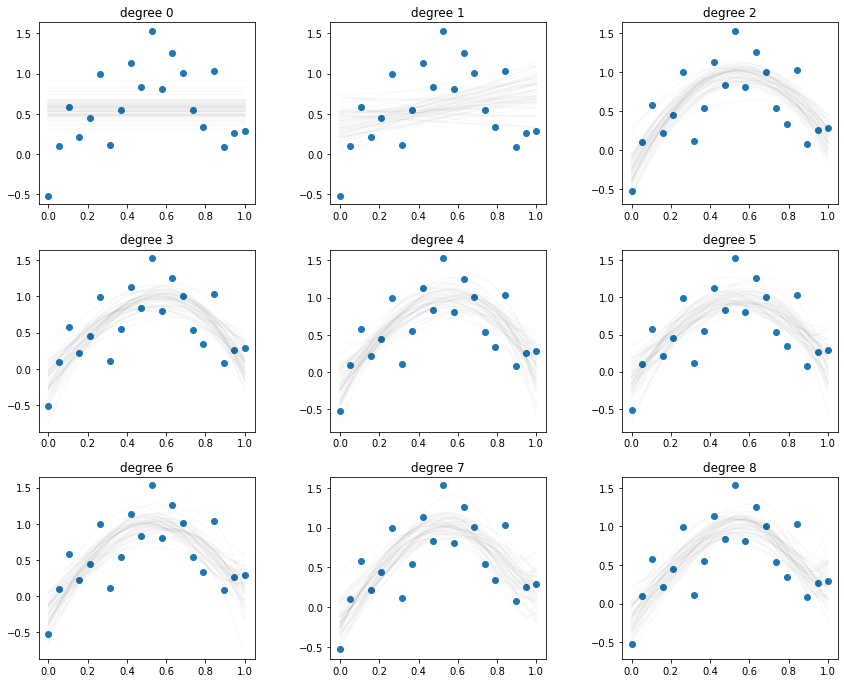

In [3]:
N_samp = 50

for i in range(degree):
    plt.subplot(int(float(degree)/3)+1,3,i+1)

    samples = post_sample_Laplace(models[i], N_samp)
    for l in range(N_samp):
        if i>0:
            pred = np.sum([x**k * samples[l,k] for k in range(i+1)],0)
        else:
            pred = x**0 * samples[l,0]
        plt.plot(x,pred, color = 'black', alpha = 0.02)
    
    plt.scatter(x,y)
    plt.title('degree ' + str(i))    
    plt.subplots_adjust(top=3, bottom=0.001, left=0.10, right=1.95, hspace=0.25,wspace=0.35)

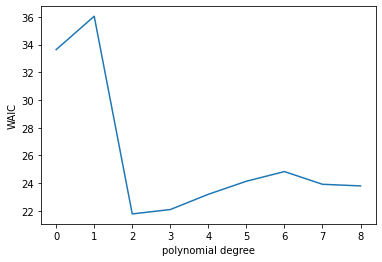

In [4]:
import scipy

WAIC = []

N_samp = 1000

for i in range(degree):
    lppd = 0
    p_waic = 0
    samples = post_sample_Laplace(models[i], N_samp)
    for k,target in enumerate(y):
        log_p = []
        for l in range(len(samples)):
            if i>0:
                pred = np.sum([x[k]**j * samples[l,j] for j in range(i+1)],0)
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
            else:
                pred = x[k]**0 * samples[l,0]
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
    
        lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
        p_waic += np.var(log_p)
    
#    print(lppd, p_waic)
    
    WAIC.append(-2*( lppd - p_waic))   

plt.plot(range(degree),WAIC)
plt.xticks(range(degree))
plt.xlabel('polynomial degree')
plt.ylabel('WAIC')
plt.show()

**Exercise.** Compare a polynomial model of order 1 to the polynomial model of order 4 with Stan

In [5]:
import pystan
from pystan.constants import MAX_UINT

In [6]:
poly_model_1_code = """
data {
    int<lower=1> N;
    vector[N] y;
    vector[N] x1;
    real mu_a;
    real<lower=0> std_a;
    real mu_b1;
    real<lower=0> std_b1;
}
parameters {
    real a;
    real b1;
    real<lower=1e-4> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = a + b1 * x1 ; 
}
model {
    b1 ~ normal(mu_b1, std_b1);
    a ~ normal(mu_a, std_a);
    y ~ normal(mu, sigma);
}
"""
model2 = pystan.StanModel(model_code = poly_model_1_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f099d5d39952dc79827a33676111323f NOW.


In [7]:
data_poly1 = pd.DataFrame({'x1' : x, 'y' : y})

In [8]:
seed = np.random.randint(0, MAX_UINT, size=1)[0]

mu_a = 0
std_a = 3

mu_b1 = 0
std_b1 = 2

In [9]:
fit2 = model2.sampling(data=
                        dict(x1 = data_poly1.x1, 
                             y = data_poly1.y, 
                             mu_a = mu_a, 
                             std_a = std_a, 
                             mu_b1 = mu_b1, 
                             std_b1 = std_b1, 
                             N = N), 
                       seed=seed, iter=2000, chains=4)

In [10]:
fit2

Inference for Stan model: anon_model_f099d5d39952dc79827a33676111323f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        0.42  5.8e-3   0.23  -0.03   0.28   0.42   0.57   0.88   1606    1.0
b1       0.33  9.7e-3   0.39  -0.44   0.09   0.33   0.59   1.12   1633    1.0
sigma    0.54  2.4e-3    0.1   0.38   0.46   0.52   0.59   0.77   1763    1.0
mu[1]    0.42  5.8e-3   0.23  -0.03   0.28   0.42   0.57   0.88   1606    1.0
mu[2]    0.44  5.3e-3   0.21   0.01    0.3   0.44   0.57   0.86   1638    1.0
mu[3]    0.45  4.8e-3    0.2   0.07   0.33   0.45   0.58   0.85   1684    1.0
mu[4]    0.47  4.3e-3   0.18   0.11   0.36   0.47   0.59   0.84   1751    1.0
mu[5]    0.49  3.9e-3   0.17   0.16   0.38   0.49    0.6   0.82   1849    1.0
mu[6]    0.51  3.4e-3   0.15    0.2   0.41    0.5   0.61   0.81   1996    1.0
mu[7]    0.52  3.0e-3   0.14   

In [11]:
lppd = 0
p_waic = 0
samples = fit2.extract()
for k,target in enumerate(y):
    log_p = []
    for l in range(len(samples['a'])):
            pred = samples['a'][l] + samples['b1'][l] * x[k] 
            log_p.append(norm.logpdf(target,pred,samples['sigma'][l]))    
    lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
    p_waic += np.var(log_p)

In [12]:
WAIC2 = (-2 * (lppd - p_waic))
WAIC2

32.7772747533502

Complete for polynomial of degree 4 and compare the fit:

# Bayesian classification


In simple terms, classification implies estimating the probability of an observation to belong to a certain class, such as positive or negative, or 0 or 1. The classical model for estimating such as probability is the Binomial model:

$$ p(y) \sim Binomial(n,p), $$

where $y$ is the number of positive cases, $n$ is the total number of trials, and $p$ is the probability of a case being positive.  

As for linear regression our likelihood model was Gaussian, here our likelihood model will be Binomial. In linear regression, we were parameterizing the mean of the Gaussian model as a linear combination of the predictors:

$$ y_i \sim \mathcal{N}(\mu_i, \sigma),$$
$$ \mu_i = a + b x_i.$$

In the Binomial model, we parameterize the probability $p$ as a linear combination of the predictors:

$$y_i \sim Binomial(n, p_i)$$
$$f(p_i) = a + b x_i.$$

There are some issues to take into account. Since the probability $p_i$ must be greater than 0 and lower than 1, by parameterizing it directly with a linear model we will incour into problems, as this would not guarantee that the linear combination is bounded in the interval $[0,1]$. Therefore we need to *link* the probability $p_i$ to the linear model through some clever parameterization, called *link function*. A classical link function is called *logit* function, and is defined with respect to the log-odds:

$$f(p_i) = logit(p_i) = \log(odds(p_i)) = \log(\frac{p_i}{1-p_i}).$$

The odds is the ratio between probability of the outcome being positive and probability of being negative. Therefore is goes from 0 ($p_i=0$) to infinity ($p_i=1$). By taking the log, we transform the odds into a quantity that can range from $-\infty$ to $\infty$, a perfect variable to be described by a linear model.
We rewrite our Binomial link function:

$$ \log(\frac{p_i}{1-p_i}) = a + b x_i,$$

and we derive:

$$\frac{p_i}{1-p_i} = \exp(a + b x_i),$$
$$p_i = \frac{\exp(a + b x_i)}{1 + \exp(a + b x_i)}. $$




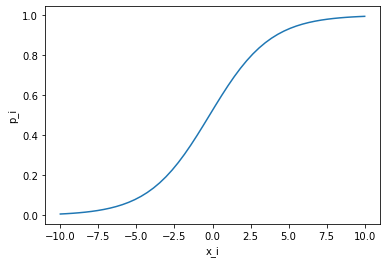

In [13]:
a = 0.1
b = 0.5

x_i = np.linspace(-10,10)

p_i = np.exp(a+b*x_i)/(1+np.exp(a+b*x_i))

plt.plot(x_i,p_i)
plt.xlabel('x_i')
plt.ylabel('p_i')
plt.show()



We recognize that the link function creates a non-linear association between $x_i$ and $p_i$, where $p_i$ is indeed bounded by 0 and 1. Importantly, although the association is linear, a unit increase in $x$ does not correspond anymore to a unit increase in the output. The magnitude of the association depends on the value of $x$ itself, and is greater in correspondence of the maximum slope of the curve. 

This kind of model is called *logistic regression*. 

## Example: Logistic regression for predicting Alzheimer's disease

In [14]:
data = pd.read_csv('adni_data')
pd.set_option('mode.chained_assignment', None) 

data_ct_ad = data.query('DX == 1 | DX == 3') 
data_ct_ad['DX'] = data_ct_ad['DX'].map({1: 0, 3: 1})

data_ct_ad['norm_brain'] = data_ct_ad['WholeBrain.bl']/data_ct_ad['ICV']
data_ct_ad['norm_brain'] = (data_ct_ad['norm_brain'] - np.mean(data_ct_ad['norm_brain']))/np.std(data_ct_ad['norm_brain'])
data_ct_ad.dropna(inplace = True)


print(data_ct_ad[:5])

   RID  APOE4  DX   AGE  WholeBrain.bl           ICV  norm_brain
0    2    0.0   0  74.3      1229738.0  1.984657e+06   -0.907716
1    3    1.0   1  81.3      1129834.0  1.920691e+06   -1.508346
3    5    0.0   0  73.7      1116633.0  1.640766e+06    0.258629
5    7    1.0   1  75.4       875798.0  1.353519e+06   -0.382669
6    8    0.0   0  84.5       948684.0  1.396068e+06    0.239182


In [15]:
binomial_model_code = """
data {
  int<lower=1> N;
  int y[N];
  real x[N];
  real mu_a;
  real<lower=0> std_a;
  real mu_b;
  real<lower=0> std_b;
}
parameters {
  real a;
  real b;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x[i])/(1 + exp(a + b * x[i])); 
    }
}
model {
  b ~ normal(mu_b, std_b);
  a ~ normal(mu_a, std_a);
  y ~ binomial(1, p_i);
}
"""
model = pystan.StanModel(model_code = binomial_model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_412ab0b943fbbb6e1bdcf98b815ee879 NOW.


In [16]:
data_to_stan = dict(x = data_ct_ad['norm_brain'], y = data_ct_ad['DX'], 
                    mu_a = 0, std_a = 10, mu_b = 0, std_b = 10, N = len(data_ct_ad['DX']))

fit = model.sampling(data = data_to_stan, seed = int(1), iter=4000, chains=4)

In [17]:
pystan.check_hmc_diagnostics(fit)

{'n_eff': True,
 'Rhat': True,
 'divergence': True,
 'treedepth': True,
 'energy': True}

In [18]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_412ab0b943fbbb6e1bdcf98b815ee879.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        -0.58  1.1e-3   0.08  -0.74  -0.64  -0.58  -0.52  -0.42   5297    1.0
b        -1.15  1.3e-3    0.1  -1.35  -1.22  -1.15  -1.09  -0.97   5705    1.0
p_i[1]    0.61  2.9e-4   0.03   0.57    0.6   0.61   0.63   0.66   7508    1.0
p_i[2]    0.76  3.2e-4   0.03    0.7   0.74   0.76   0.78   0.81   7273    1.0
p_i[3]    0.29  2.7e-4   0.02   0.26   0.28   0.29   0.31   0.33   5007    1.0
p_i[4]    0.47  2.6e-4   0.02   0.43   0.45   0.47   0.48   0.51   6146    1.0
p_i[5]     0.3  2.7e-4   0.02   0.26   0.28    0.3   0.31   0.34   5025    1.0
p_i[6]     0.2  2.7e-4   0.02   0.17   0.19    0.2   0.22   0.24   4848    1.0
p_i[7]     0.3  2.7e-4   0.02   0.27   0.29    0.3   0.31   

In [19]:
est_a = fit.extract()['a']
quantiles_a = np.quantile(est_a, [0.05, 0.5, 0.95])

est_b = fit.extract()['b']
quantiles_b = np.quantile(est_b, [0.05, 0.5, 0.95])

logistic_a_50 = np.exp(quantiles_a[1])/(1 + np.exp(quantiles_a[1]))
logistic_a_5 = np.exp(quantiles_a[0])/(1 + np.exp(quantiles_a[0]))
logistic_a_95 = np.exp(quantiles_a[2])/(1 + np.exp(quantiles_a[2]))

print('Baseline probability of disease: \n')
print('5%  :', logistic_a_5)
print('50% :', logistic_a_50)
print('95% :', logistic_a_95)


logistic_b_95 = np.exp(quantiles_a[0] - quantiles_b[0])/(1 + np.exp(quantiles_a[0] - quantiles_b[0]))
logistic_b_50 = np.exp(quantiles_a[0] - quantiles_b[1])/(1 + np.exp(quantiles_a[0] - quantiles_b[1]))
logistic_b_5 = np.exp(quantiles_a[0] - quantiles_b[2])/(1 + np.exp(quantiles_a[0] - quantiles_b[2]))


print('Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): \n')
print('5%  :', logistic_b_5)
print('50% :', logistic_b_50)
print('95% :', logistic_b_95)

Baseline probability of disease: 

5%  : 0.32821071829907084
50% : 0.35875565350752264
95% : 0.3906763259016573
Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): 

5%  : 0.5695465298457103
50% : 0.6073349409823633
95% : 0.6464387666690923


In [20]:
p_i = fit.extract()['p_i']

lppd = []
pwaic = []
for k in range(len(data_ct_ad)):
    id_log_lik = []
    for i in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[k], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic = -2 * (np.sum(lppd) -np.sum(pwaic))

What happens when we include another predictor, for example the presence of the genetic mutation APOE4?

In [21]:
binomial_model_two_pred_code = """
data {
  int<lower=1> N;
  int y[N];
  real x_b[N];
  real x_g[N];
  real mu_a;
  real<lower=0> std_a;
  real mu_b;
  real<lower=0> std_b;
  real mu_c;
  real<lower=0> std_c;
}
parameters {
  real a;
  real b;
  real c;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x_b[i] + c * x_g[i])/(1 + exp(a + b * x_b[i] + c * x_g[i])); 
    }
}
model {
  a ~ normal(mu_a, std_a);
  b ~ normal(mu_b, std_b);
  c ~ normal(mu_c, std_c);
  y ~ binomial(1, p_i);
}
"""
model = pystan.StanModel(model_code = binomial_model_two_pred_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c0ba10ec4a771726050e0f42751936e2 NOW.


In [22]:
data_to_stan = dict(x_b = data_ct_ad['norm_brain'], x_g = data_ct_ad['APOE4'], 
                    y = data_ct_ad['DX'], 
                    mu_a = 0, std_a = 10, mu_b = 0, std_b = 10,  mu_c = 0, std_c = 10, 
                    N = len(data_ct_ad['DX']))

fit_apoe = model.sampling(data = data_to_stan, seed = int(1), iter=4000, chains=4)

In [23]:
fit_apoe


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_c0ba10ec4a771726050e0f42751936e2.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        -1.48  1.9e-3   0.13  -1.73  -1.56  -1.48  -1.39  -1.23   4428    1.0
b        -1.25  1.5e-3   0.11  -1.47  -1.32  -1.25  -1.18  -1.04   5318    1.0
c         1.58  2.2e-3   0.15   1.29   1.48   1.58   1.68   1.88   4723    1.0
p_i[1]    0.41  4.3e-4   0.03   0.36   0.39   0.41   0.44   0.48   5487    1.0
p_i[2]    0.88  2.5e-4   0.02   0.84   0.86   0.88   0.89   0.91   6547    1.0
p_i[3]    0.14  2.6e-4   0.02   0.11   0.13   0.14   0.15   0.18   4373    1.0
p_i[4]    0.64  2.7e-4   0.03   0.59   0.62   0.64   0.66   0.69   9721    1.0
p_i[5]    0.15  2.6e-4   0.02   0.11   0.13   0.14   0.16   0.18   4374    1.0
p_i[6]    0.32  3.3e-4   0.03   0.27    0.3   0.32   0.34   

Is this model better fitting the diagnosis than the previous one?

In [24]:
p_i = fit_apoe.extract()['p_i']

lppd = []
pwaic = []
for k in range(len(data_ct_ad)):
    id_log_lik = []
    for i in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[k], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic_apoe = -2 * (np.sum(lppd) - np.sum(pwaic))

In [25]:
waic

922.1536985905234

In [26]:
waic_apoe

782.3471489560841